In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [2]:
nielsen15 = pd.read_csv('../../Nielsen/aggregated_nielsen_2015.csv')
nielsen16 = pd.read_csv('../..//Nielsen/aggregated_nielsen_2016.csv')
nielsen15['year'] = 2015
nielsen16['year'] = 2016

nielsen = pd.concat((nielsen15, nielsen16))
nielsen = nielsen[~nielsen.is_walmart]
density_path = r"C:\Users\inesn\Documents\Mines\2A\TR\econometrics\data_collection\plein_de_data\Average_Household_Size_and_Population_Density_-_County.csv"
density = pd.read_csv(density_path)
density = density[["GEOID", "B01001_calc_PopDensity"]]
nielsen = pd.merge(nielsen, density,  how='inner', left_on='guessed_store_county_fips', right_on='GEOID')
nielsen = nielsen.rename(columns={"B01001_calc_PopDensity": "Population density (people/km^2)"})

## Entriy/exit dates
fandom = pd.read_csv('../data_collection/plein_de_data/fandom_traitées.csv', parse_dates=['Opening_date', 'Closing_date'])[['State', 'County_name', 'County_fips', 'Opening_date', 'Closing_date']]

# We drop the state in which we do not trust our data (some mistakes stillremain)
fandom = fandom[~np.isin(fandom.State, ('CA', 'GA', 'KS', 'LA', 'TX'))]
nielsen = nielsen[~np.isin(nielsen.store_state, ('CA', 'GA', 'KS', 'LA', 'TX'))]

# We concentrate our study on the movements (entries & exits) during the fiscal years 2015 and 2016
movements = fandom[((fandom.Opening_date >= '2015-01-31') & (fandom.Opening_date <= '2017-01-31')) | ((fandom.Closing_date >= '2015-01-31') & (fandom.Closing_date <= '2017-01-31'))]
#movements['year'] = movements.Opening_date.dt.year
#movements['month'] = movements.Opening_date.dt.month

In [3]:
nielsen.groupby('product_group_descr').mean().sort_values('upc_price_std', ascending=True).head(30)

C:\Users\inesn\AppData\Local\Temp\ipykernel_5640\742464934.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  nielsen.groupby('product_group_descr').mean().sort_values('upc_price_std', ascending=True).head(30)


,is_walmart,guessed_store_county_fips,purchase_year,purchase_month,upc_price,upc_price_std,nb_of_obs,year,GEOID,Population density (people/km^2)
product_group_descr,,,,,,,,,,
YEAST,0.0,34358.913876,2015.550239,6.937799,3.457727,0.190346,1.186603,2015.550239,34358.913876,522.499322
"JUICES, DRINKS-FROZEN",0.0,31276.076638,2015.491695,6.359750,1.825015,0.440367,4.133884,2015.491695,31276.076638,338.657486
ICE,0.0,29888.888000,2015.499846,6.668000,2.318100,0.465500,2.631077,2015.499846,29888.888000,401.810312
VEGETABLES - CANNED,0.0,31244.049491,2015.498625,6.517163,1.038096,0.517872,29.851215,2015.498625,31244.049491,175.737115
PASTA,0.0,31698.057646,2015.500946,6.462988,1.449016,0.546721,15.659901,2015.500946,31698.057646,204.703387
"PUDDING, DESSERTS-DAIRY",0.0,31518.914590,2015.495125,6.446009,2.434284,0.547729,4.569520,2015.495125,31518.914590,421.110079
FRUIT - CANNED,0.0,31497.732971,2015.496603,6.641208,1.654077,0.633034,10.802289,2015.496603,31497.732971,218.655061
DOUGH PRODUCTS,0.0,31231.945841,2015.496236,6.548513,1.972625,0.634339,8.207640,2015.496236,31231.945841,218.461106
SOUP,0.0,31434.031000,2015.497921,6.540429,1.506098,0.698717,25.787703,2015.497921,31434.031000,185.135259


In [4]:
categories = [
    "FRESH PRODUCE",
    "BREAD AND BAKED GOODS",
    "MILK",
    "SNACKS",
    "PACKAGED MEATS-DELI",
    "CHEESE",
    "UNPREP MEAT/POULTRY/SEAFOOD-FRZN",
    "CARBONATED BEVERAGES",
    "CONDIMENTS, GRAVIES, AND SAUCES",
    "CANDY",
    "JUICE, DRINKS - CANNED, BOTTLED",
    "EGGS",
    "CEREAL",
    "PASTA",
    "COT CHEESE, SOUR CREAM, TOPPINGS",
    "PAPER PRODUCTS",
    "YOGURT"
]
state_for_cat = {"FRESH PRODUCE" : "FL",
    "BREAD AND BAKED GOODS" : "FL",
    "MILK" : "FL",
    "SNACKS" : "FL",
    "PACKAGED MEATS-DELI" : "FL",
    "CHEESE" : "FL",
    "UNPREP MEAT/POULTRY/SEAFOOD-FRZN" : "FL",
    "CARBONATED BEVERAGES" : "FL",
    "CONDIMENTS, GRAVIES, AND SAUCES" : "FL",
    "CANDY" : "FL",
    "JUICE, DRINKS - CANNED, BOTTLED" : "FL",
    "EGGS" : "FL",
    "CEREAL" : "FL",
    "PASTA" : "FL"}

## Building a better control group

In [5]:
# Selection of a promising (state, category), that is, statisticaly significant 
# interaction term for the model with time fixed effects, and a pattern that makes sense to us (negative term)
state = "NC"
category = "SNACKS"
# coeff/stde = 2.1, coeff = 0.098

In [6]:
#for state in states :
    # 
product_group = nielsen[(nielsen.product_group_descr == category)&(nielsen.store_state == state)
                       ]
    # The control group is composed by all states where nothing (no entry nor exit) happened.
control = product_group[~np.isin(product_group.guessed_store_county_fips, movements)].copy()

# The treatment group is composed by the states where one entry took place in 2016 and where this entry is the only movement
count = movements.groupby('County_fips').count()
count = count[count.State == 1] # No more than one movement in the treatement group
treatment_movements = movements[(np.isin(movements.County_fips, count.index))]
treatment_movements = treatment_movements[(treatment_movements.Opening_date>='2015-01-31' ) & (treatment_movements.Opening_date<='2017-01-31') & ((treatment_movements.Closing_date>'2017-01-31') | (treatment_movements.Closing_date.apply(str) == 'NaT'))]

treatment = product_group[np.isin(product_group.guessed_store_county_fips, treatment_movements.County_fips )].copy()
treatment = treatment.merge(treatment_movements, left_on='guessed_store_county_fips', right_on='County_fips')

# We create our dummies for the regression
control['treat'] = False
control['interaction'] = False
control['time_effects'] = list(zip(control.purchase_year, control.purchase_month))

treatment['treat'] = True
treatment['interaction'] = (((treatment.purchase_month > treatment.Opening_date.dt.month) & (treatment.purchase_year == treatment.Opening_date.dt.year))|
                           (treatment.purchase_year > treatment.Opening_date.dt.year))
treatment['time_effects'] = list(zip(treatment.purchase_year, treatment.purchase_month))


# Final dataset for the regression :q

df0 = pd.concat((control, treatment))
df = df0[['upc_price', 'treat', 'interaction','time_effects']]
df = df[df.upc_price != 0]
reg0 = smf.ols(formula='np.log(upc_price) ~ treat + interaction + C(time_effects)', data=df)
results0 = reg0.fit()

if abs(results0.params[2] / results0.bse[2]) > 0. :
    print("=========================================================")
 #   print(state)
    print(f"Coef : {np.exp(results0.params[2])-1}")
    print(f"Coef/err : {abs(results0.params[2] / results0.bse[2])}")
    print(f"CI_up : {np.exp(results0.conf_int(alpha=0.05)[0][2])-1}")
    print(f"CI_down : {np.exp(results0.conf_int(alpha=0.05)[1][2])-1}")

Coef : 0.09834994487522719
Coef/err : 2.1153948954264417
CI_up : 0.006846739080954789
CI_down : 0.19816905054346812


In [7]:
results0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      np.log(upc_price)   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     1.621
Date:                Mon, 07 Nov 2022   Prob (F-statistic):             0.0272
Time:                        22:32:42   Log-Likelihood:                -155.10
No. Observations:                1545   AIC:                             362.2
Df Residuals:                    1519   BIC:                             501.1
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         0.8344      0.034     24.583      0.000       0.768       0.901
treat[T.True]                     0.0202      0.035      0.579      0.563      -0.048       0.089
interaction[T.True]               0.0938      0.044      2.115      0.035       0.007       0.181
C(time_effects)[T.(2015, 2)]      0.0516      0.047      1.091      0.276      -0.041       0.144
C(time_effects)[T.(2015, 3)]      0.0253      0.048      0.529      0.597      -0.069       0.119
C(time_effects)[T.(2015, 4)]      0.0203      0.048      0.428      0.669      -0.073       0.114
C(time_effects)[T.(2015, 5)]      0.0192      0.048      0.403      0.687      -0.074       0.113
C(time_effects)[T.(2015, 6)]      0.0723      0.047      1.532      0.126      -0.020       0.165
C(time_effects)[T.(2015, 7)]      0.0325      0.048      0.679      0.497      -0.061       0.126
C(time_effects)[T.(2015, 8)]      0.0307      0.048      0.644      0.520      -0.063       0.124
C(time_effects)[T.(2015, 9)]      0.0629      0.047      1.326      0.185      -0.030       0.156
C(time_effects)[T.(2015, 10)]     0.0235      0.048      0.491      0.623      -0.070       0.117
C(time_effects)[T.(2015, 11)]     0.0534      0.048      1.102      0.271      -0.042       0.148
C(time_effects)[T.(2015, 12)]     0.0749      0.047      1.583      0.114      -0.018       0.168
C(time_effects)[T.(2016, 1)]      0.0418      0.048      0.873      0.383      -0.052       0.136
C(time_effects)[T.(2016, 2)]      0.0056      0.048      0.116      0.908      -0.089       0.100
C(time_effects)[T.(2016, 3)]      0.0455      0.048      0.938      0.348      -0.050       0.141
C(time_effects)[T.(2016, 4)]      0.0796      0.047      1.681      0.093      -0.013       0.172
C(time_effects)[T.(2016, 5)]      0.0027      0.048      0.057      0.955      -0.091       0.096
C(time_effects)[T.(2016, 6)]     -0.0726      0.048     -1.528      0.127      -0.166       0.021
C(time_effects)[T.(2016, 7)]      0.0228      0.048      0.475      0.635      -0.071       0.117
C(time_effects)[T.(2016, 8)]      0.0046      0.048      0.096      0.923      -0.089       0.098
C(time_effects)[T.(2016, 9)]      0.0428      0.048      0.897      0.370      -0.051       0.137
C(time_effects)[T.(2016, 10)]     0.0553      0.048      1.150      0.250      -0.039       0.150
C(time_effects)[T.(2016, 11)]     0.0511      0.048      1.058      0.290      -0.044       0.146
C(time_effects)[T.(2016, 12)]     0.0765      0.048      1.601      0.109      -0.017       0.170
==============================================================================
Omnibus:                      508.505   Durbin-Watson:                   1.402
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3273.566
Skew

In [8]:
y_hat = results0.fittedvalues
u_hat = results0.resid
y_hat = y_hat.rename("fitted_value").to_frame()
u_hat = u_hat.rename("residual").to_frame()

In [9]:
new0 = pd.merge(df0, y_hat, left_index=True, right_index=True)
new = pd.merge(new0, u_hat, left_index=True, right_index=True)
new['date']=new['purchase_month']+12*(new['purchase_year']-2015)
new['fitted_value']=np.exp(new['fitted_value'])-1
new['residual']= new['upc_price']-new['fitted_value']
new['s_residual']=new['residual']**2
new = new[['upc_price', 'nb_of_obs', 
       'Population density (people/km^2)', 'treat',
       'interaction', 'time_effects', 'store_state', 'guessed_store_county',
       'guessed_store_county_fips',
       'Opening_date', 'Closing_date', 'fitted_value', 'residual', 'date', 's_residual']]

In [10]:
new_t = new[new.treat]
new_c = new[~new.treat]
new_t_i = new_t[new_t.interaction]
new_t_ni = new_t[~new_t.interaction]

### 1. Nb of counties in control and treatment groups, density distribution

7.94127332458665 484.029322859142


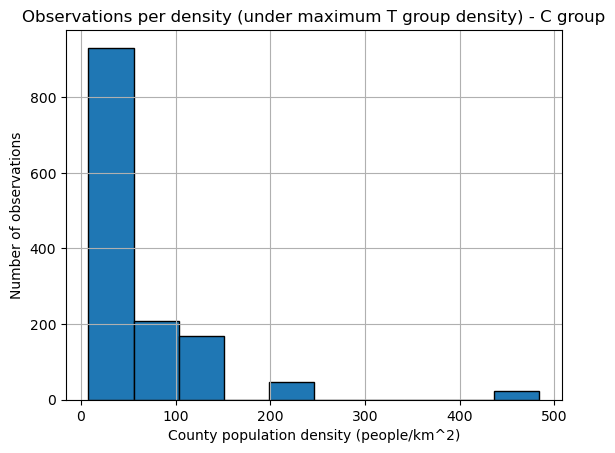

In [37]:
print(control["Population density (people/km^2)"].min(),control["Population density (people/km^2)"].max())
plt.hist(control["Population density (people/km^2)"], edgecolor='black')
plt.ylabel('Number of observations')
plt.xlabel('County population density (people/km^2)')
plt.title('Observations per density (under maximum T group density) - C group')
#plt.ylim(0, 3000)
plt.grid(True)
plt.show()
#savefig("../../results_summary/density_control_hist_0.png")

In [12]:
#control group analysis
print(f"Size of the control group: {len(control.guessed_store_county_fips.unique())}.")
print(f"Size of the control group: {control.guessed_store_county_fips.count()}.")
control_d = control.groupby(["store_state","guessed_store_county_fips", "guessed_store_county"]).mean()

Size of the control group: 65.
Size of the control group: 1378.


C:\Users\inesn\AppData\Local\Temp\ipykernel_38344\2391365913.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  control_d = control.groupby(["store_state","guessed_store_county_fips", "guessed_store_county"]).mean()


In [13]:
control.groupby(["store_state","guessed_store_county_fips", "guessed_store_county"]).count().head(50)

is_walmart  \
store_state guessed_store_county_fips guessed_store_county               
NC          37001                     ALAMANCE                      24   
            37003                     ALEXANDER                     24   
            37005                     ALLEGHANY                     16   
            37007                     ANSON                         20   
            37009                     ASHE                          24   
            37013                     BEAUFORT                      24   
            37015                     BERTIE                        22   
            37017                     BLADEN                        21   
            37019                     BRUNSWICK                     24   
            37021                     BUNCOMBE                      24   
            37025                     CABARRUS                      24   
            37031                     CARTERET                      24   
            37037                     CHATHAM                       24   
            37039                     CHEROKEE                      24   
            37043                     CLAY                          24   
            37045                     CLEVELAND                     24   
            37047                     COLUMBUS                      24   
            37049                     CRAVEN                        24   
            37053                     CURRITUCK                     12   
            37055                     DARE                          23   
            37059                     DAVIE                         24   
            37061                     DUPLIN                        24   
            37065                     EDGECOMBE                     22   
            37069                     FRANKLIN                      24   
            37071                     GASTON                        24   
            37077                     GRANVILLE                     24   
            37083                     HALIFAX                       23   
            37087                     HAYWOOD                       24   
            37089                     HENDERSON                     24   
            37091                     HERTFORD                      23   
            37093                     HOKE                          18   
            37099                     JACKSON                       13   
            37103                     JONES                          5   
            37107                     LENOIR                        24   
            37109                     LINCOLN                       24   
            37111                     MCDOWELL                      24   
            37113                     MACON                         16   
            37117                     MARTIN                        17   
            37121                     MITCHELL                       6   
            37123                     MONTGOMERY                     4   
            37127                     NASH                          24   
            37131                     NORTHAMPTON                   12   
            37135                     ORANGE                        24   
            37139                     PASQUOTANK                    24   
            37145                     PERSON                        24   
            37149                     POLK                          23   
            37153                     RICHMOND                      24   
            37157                     ROCKINGHAM                    24   
            37159                     ROWAN                         24   
            37161                     RUTHERFORD                    23   

                                                            purchase_year  \
store_state guessed_store_county_fips guessed_store_county                  
NC          37001                     ALAMANCE           

In [14]:
control.groupby(["store_state","guessed_store_county_fips", "guessed_store_county"]).mean().head(50)

C:\Users\inesn\AppData\Local\Temp\ipykernel_38344\462922393.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  control.groupby(["store_state","guessed_store_county_fips", "guessed_store_county"]).mean().head(50)


is_walmart  \
store_state guessed_store_county_fips guessed_store_county               
NC          37001                     ALAMANCE                     0.0   
            37003                     ALEXANDER                    0.0   
            37005                     ALLEGHANY                    0.0   
            37007                     ANSON                        0.0   
            37009                     ASHE                         0.0   
            37013                     BEAUFORT                     0.0   
            37015                     BERTIE                       0.0   
            37017                     BLADEN                       0.0   
            37019                     BRUNSWICK                    0.0   
            37021                     BUNCOMBE                     0.0   
            37025                     CABARRUS                     0.0   
            37031                     CARTERET                     0.0   
            37037                     CHATHAM                      0.0   
            37039                     CHEROKEE                     0.0   
            37043                     CLAY                         0.0   
            37045                     CLEVELAND                    0.0   
            37047                     COLUMBUS                     0.0   
            37049                     CRAVEN                       0.0   
            37053                     CURRITUCK                    0.0   
            37055                     DARE                         0.0   
            37059                     DAVIE                        0.0   
            37061                     DUPLIN                       0.0   
            37065                     EDGECOMBE                    0.0   
            37069                     FRANKLIN                     0.0   
            37071                     GASTON                       0.0   
            37077                     GRANVILLE                    0.0   
            37083                     HALIFAX                      0.0   
            37087                     HAYWOOD                      0.0   
            37089                     HENDERSON                    0.0   
            37091                     HERTFORD                     0.0   
            37093                     HOKE                         0.0   
            37099                     JACKSON                      0.0   
            37103                     JONES                        0.0   
            37107                     LENOIR                       0.0   
            37109                     LINCOLN                      0.0   
            37111                     MCDOWELL                     0.0   
            37113                     MACON                        0.0   
            37117                     MARTIN                       0.0   
            37121                     MITCHELL                     0.0   
            37123                     MONTGOMERY                   0.0   
            37127                     NASH                         0.0   
            37131                     NORTHAMPTON                  0.0   
            37135                     ORANGE                       0.0   
            37139                     PASQUOTANK                   0.0   
            37145                     PERSON                       0.0   
            37149                     POLK                         0.0   
            37153                     RICHMOND                     0.0   
            37157                     ROCKINGHAM                   0.0   
            37159                     ROWAN                        0.0   
            37161                     RUTHERFORD                   0.0   

                                                            purchase_year  \
store_state guessed_store_county_fips guessed_store_county                  
NC          37001                     ALAMANCE           

7.941273324586649 484.029322859142


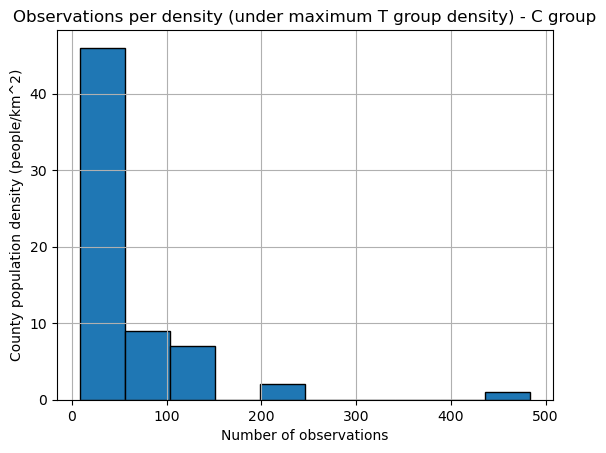

In [15]:
print(control_d["Population density (people/km^2)"].min(),control_d["Population density (people/km^2)"].max())
plt.hist(control_d["Population density (people/km^2)"], edgecolor='black')
plt.xlabel('Number of observations')
plt.ylabel('County population density (people/km^2)')
plt.title('Observations per density (under maximum T group density) - C group')
#plt.ylim(0, 3000)
plt.grid(True)
plt.show()
#savefig("../../results_summary/density_control_hist_0.png")

In [16]:
# treatment group analysis
print(f"Size of the treatment group: {len(treatment.guessed_store_county_fips.unique())}.")
print(f"Size of the treatment group: {treatment.guessed_store_county_fips.count()}.")
treatment_d = treatment.groupby(["store_state","guessed_store_county_fips", "guessed_store_county"]).mean()

Size of the treatment group: 7.
Size of the treatment group: 167.


C:\Users\inesn\AppData\Local\Temp\ipykernel_38344\3664718350.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  treatment_d = treatment.groupby(["store_state","guessed_store_county_fips", "guessed_store_county"]).mean()


In [17]:
treatment.groupby(["store_state","guessed_store_county_fips", "guessed_store_county"]).count().head(50)

is_walmart  \
store_state guessed_store_county_fips guessed_store_county               
NC          37023                     BURKE                         24   
            37027                     CALDWELL                      24   
            37067                     FORSYTH                       24   
            37097                     IREDELL                       24   
            37129                     NEW HANOVER                   24   
            37141                     PENDER                        24   
            37195                     WILSON                        23   

                                                            purchase_year  \
store_state guessed_store_county_fips guessed_store_county                  
NC          37023                     BURKE                            24   
            37027                     CALDWELL                         24   
            37067                     FORSYTH                          24   
            37097                     IREDELL                          24   
            37129                     NEW HANOVER                      24   
            37141                     PENDER                           24   
            37195                     WILSON                           23   

                                                            purchase_month  \
store_state guessed_store_county_fips guessed_store_county                   
NC          37023                     BURKE                             24   
            37027                     CALDWELL                          24   
            37067                     FORSYTH                           24   
            37097                     IREDELL                           24   
            37129                     NEW HANOVER                       24   
            37141                     PENDER                            24   
            37195                     WILSON                            23   

                                                            product_group_descr  \
store_state guessed_store_county_fips guessed_store_county                        
NC          37023                     BURKE                                  24   
            37027                     CALDWELL                               24   
            37067                     FORSYTH                                24   
            37097                     IREDELL                                24   
            37129                     NEW HANOVER                            24   
            37141                     PENDER                                 24   
            37195                     WILSON                                 23   

                                                            upc_price  \
store_state guessed_store_county_fips guessed_store_county              
NC          37023                     BURKE                        24   
            37027                     CALDWELL                     24   
            37067                     FORSYTH                      24   
            37097                     IREDELL                      24   
            37129                     NEW HANOVER                  24   
            37141                     PENDER                       24   
            37195                     WILSON                       23   

                                                            upc_price_std  \
store_state guessed_store_county_fips guessed_store_county                  
NC          37023                     BURKE                            24   
            37027                     CALDWELL                         24   
            37067                     FORSYTH                          24   
            37097                     IREDELL                          24   
            37129                     NEW HANOVER                      24   
            37141                     PENDER       

In [18]:
treatment.groupby(["store_state","guessed_store_county_fips", "guessed_store_county"]).mean().head(50)

C:\Users\inesn\AppData\Local\Temp\ipykernel_38344\4114228560.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  treatment.groupby(["store_state","guessed_store_county_fips", "guessed_store_county"]).mean().head(50)


is_walmart  \
store_state guessed_store_county_fips guessed_store_county               
NC          37023                     BURKE                        0.0   
            37027                     CALDWELL                     0.0   
            37067                     FORSYTH                      0.0   
            37097                     IREDELL                      0.0   
            37129                     NEW HANOVER                  0.0   
            37141                     PENDER                       0.0   
            37195                     WILSON                       0.0   

                                                            purchase_year  \
store_state guessed_store_county_fips guessed_store_county                  
NC          37023                     BURKE                   2015.500000   
            37027                     CALDWELL                2015.500000   
            37067                     FORSYTH                 2015.500000   
            37097                     IREDELL                 2015.500000   
            37129                     NEW HANOVER             2015.500000   
            37141                     PENDER                  2015.500000   
            37195                     WILSON                  2015.478261   

                                                            purchase_month  \
store_state guessed_store_county_fips guessed_store_county                   
NC          37023                     BURKE                       6.500000   
            37027                     CALDWELL                    6.500000   
            37067                     FORSYTH                     6.500000   
            37097                     IREDELL                     6.500000   
            37129                     NEW HANOVER                 6.500000   
            37141                     PENDER                      6.500000   
            37195                     WILSON                      6.434783   

                                                            upc_price  \
store_state guessed_store_county_fips guessed_store_county              
NC          37023                     BURKE                  2.279715   
            37027                     CALDWELL               2.610027   
            37067                     FORSYTH                2.524828   
            37097                     IREDELL                2.503430   
            37129                     NEW HANOVER            2.770209   
            37141                     PENDER                 2.686324   
            37195                     WILSON                 2.951989   

                                                            upc_price_std  \
store_state guessed_store_county_fips guessed_store_county                  
NC          37023                     BURKE                      0.979199   
            37027                     CALDWELL                   1.029136   
            37067                     FORSYTH                    1.163676   
            37097                     IREDELL                    1.872429   
            37129                     NEW HANOVER                1.248662   
            37141                     PENDER                     0.933599   
            37195                     WILSON                     0.996748   

                                                             nb_of_obs  \
store_state guessed_store_county_fips guessed_store_county               
NC          37023                     BURKE                  41.416667   
            37027                     CALDWELL               13.291667   
            37067                     FORSYTH               150.916667   
            37097                     IREDELL                80.166667   
            37129                     NEW HANOVER            69.333333   
            37141                     PENDER                 15.500000   
            37195                     WILSON        

26.1538678361341 450.441761812079


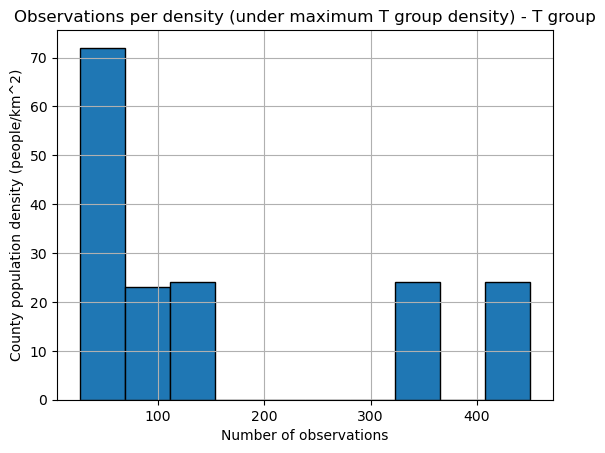

In [19]:
print(treatment["Population density (people/km^2)"].min(),treatment["Population density (people/km^2)"].max())
plt.hist(treatment["Population density (people/km^2)"], edgecolor='black')
plt.xlabel('Number of observations')
plt.ylabel('County population density (people/km^2)')
plt.title('Observations per density (under maximum T group density) - T group')
#plt.ylim(0, 3000)
plt.grid(True)
plt.show()
#savefig("../../results_summary/density_control_hist_0.png")

26.1538678361341 450.441761812079


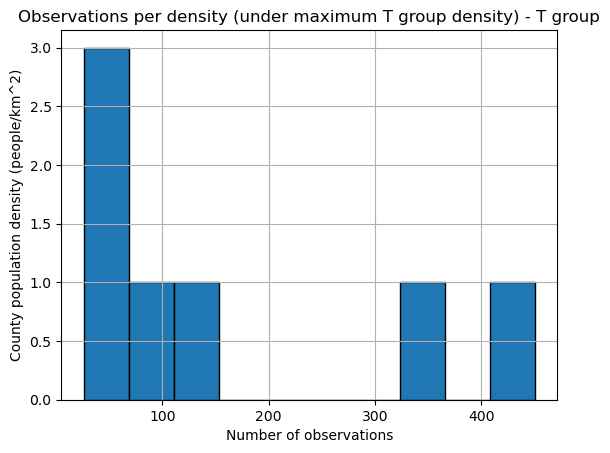

In [20]:
print(treatment_d["Population density (people/km^2)"].min(),treatment_d["Population density (people/km^2)"].max())
plt.hist(treatment_d["Population density (people/km^2)"], edgecolor='black')
plt.xlabel('Number of observations')
plt.ylabel('County population density (people/km^2)')
plt.title('Observations per density (under maximum T group density) - T group')
#plt.ylim(0, 3000)
plt.grid(True)
plt.show()
#savefig("../../results_summary/density_control_hist_0.png")

### 2. Visualising our regression results across time (fitted_values and residuals) (impact of density)

#### 2.1. On entire dataset

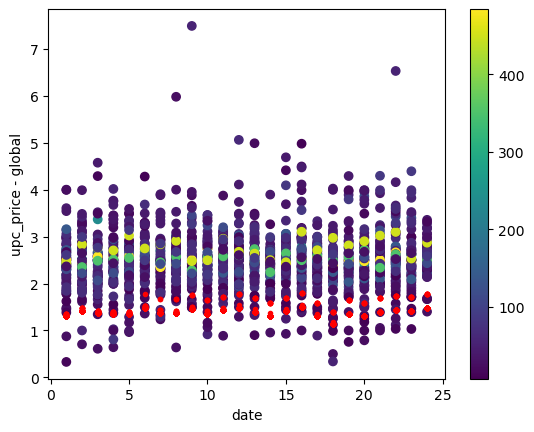

In [21]:
plt.scatter('date','upc_price', data = new, c=new['Population density (people/km^2)'].astype(int).to_numpy())
plt.plot('date','fitted_value', data = new, color='red', marker='.', linestyle='')
plt.ylabel('upc_price - global')
plt.xlabel('date')
plt.colorbar()
#plt.xlim(445,455)

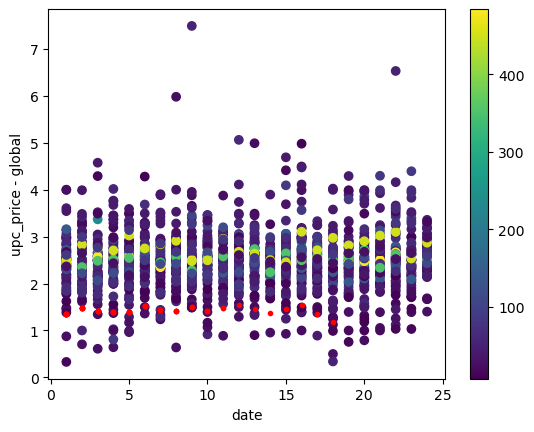

In [22]:
plt.scatter('date','upc_price', data = new, c=new['Population density (people/km^2)'].astype(int).to_numpy())
plt.plot('date','fitted_value', data = new_t_ni, color='red', marker='.', linestyle='')
plt.ylabel('upc_price - global')
plt.xlabel('date')
plt.colorbar()
#plt.xlim(445,455)

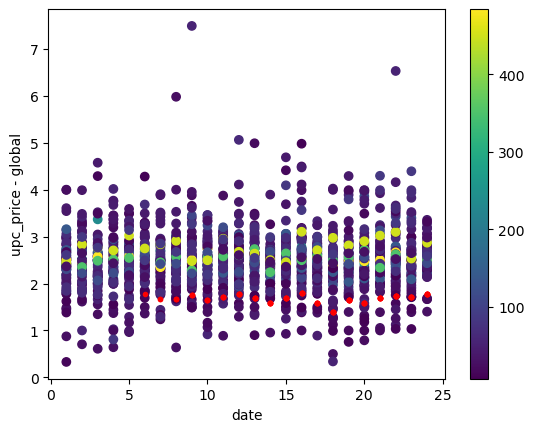

In [23]:
plt.scatter('date','upc_price', data = new, c=new['Population density (people/km^2)'].astype(int).to_numpy())
plt.plot('date','fitted_value', data = new_t_i, color='red', marker='.', linestyle='')
plt.ylabel('upc_price - global')
plt.xlabel('date')
plt.colorbar()
#plt.xlim(445,455)

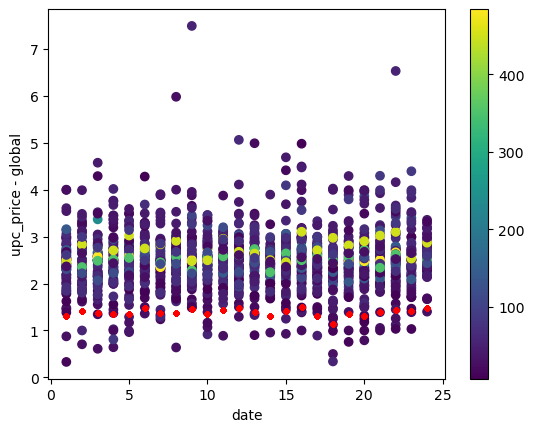

In [24]:
plt.scatter('date','upc_price', data = new, c=new['Population density (people/km^2)'].astype(int).to_numpy())
plt.plot('date','fitted_value', data = new_c, color='red', marker='.', linestyle='')
plt.ylabel('upc_price - global')
plt.xlabel('date')
plt.colorbar()
#plt.xlim(445,455)

In [25]:
new.groupby("date")["fitted_value"].nunique()

date
1     2
2     2
3     2
4     2
5     2
6     3
7     3
8     3
9     3
10    3
11    3
12    3
13    3
14    3
15    3
16    3
17    3
18    3
19    2
20    2
21    2
22    2
23    2
24    2
Name: fitted_value, dtype: int64

#### 2.2. For control group

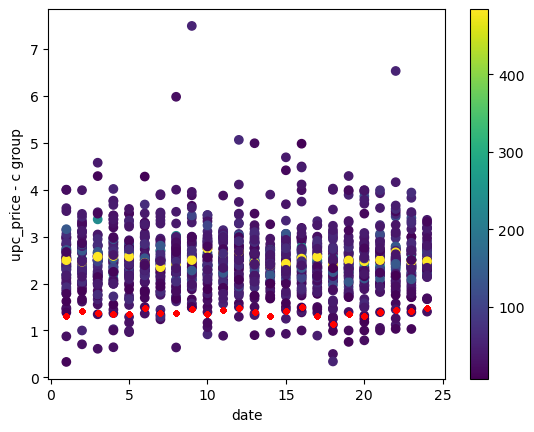

In [26]:
plt.scatter('date','upc_price', data = new_c, c=new_c['Population density (people/km^2)'].astype(int).to_numpy())
plt.plot('date','fitted_value', data = new_c, color='red', marker='.', linestyle='')
plt.ylabel('upc_price - c group')
plt.xlabel('date')
plt.colorbar()
#plt.xlim(445,455)

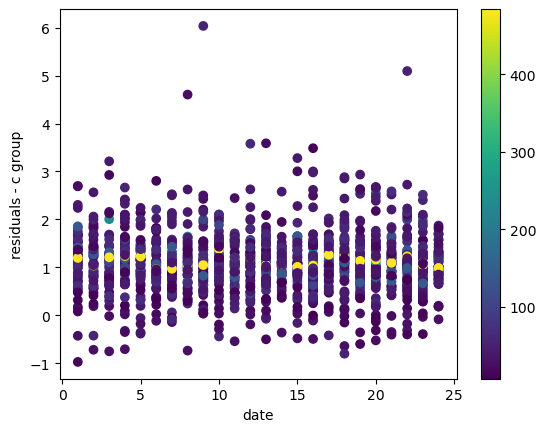

In [27]:
plt.scatter('date','residual', data = new_c, c=new_c['Population density (people/km^2)'].astype(int).to_numpy())
#plt.plot('date','fitted_value', data = new_c, color='red', marker='.', linestyle='')
plt.ylabel('residuals - c group')
plt.xlabel('date')
plt.colorbar()
#plt.xlim(445,455)

#### 2.3. For treatment group before entry

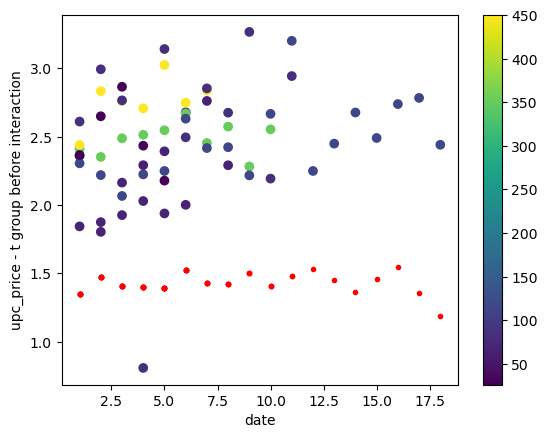

In [28]:
plt.scatter('date','upc_price', data = new_t_ni, c=new_t_ni['Population density (people/km^2)'].astype(int).to_numpy())
plt.plot('date','fitted_value', data = new_t_ni, color='red', marker='.', linestyle='')
plt.ylabel('upc_price - t group before interaction')
plt.xlabel('date')
plt.colorbar()
#plt.xlim(445,455)

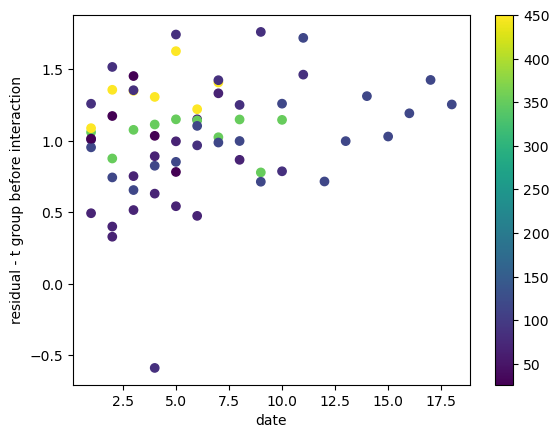

In [29]:
plt.scatter('date','residual', data = new_t_ni, c=new_t_ni['Population density (people/km^2)'].astype(int).to_numpy())
#plt.plot('date','fitted_value', data = new_t_ni, color='red', marker='.', linestyle='')
plt.ylabel('residual - t group before interaction')
plt.xlabel('date')
plt.colorbar()
#plt.xlim(445,455)

#### 2.4. For treatment group after entry

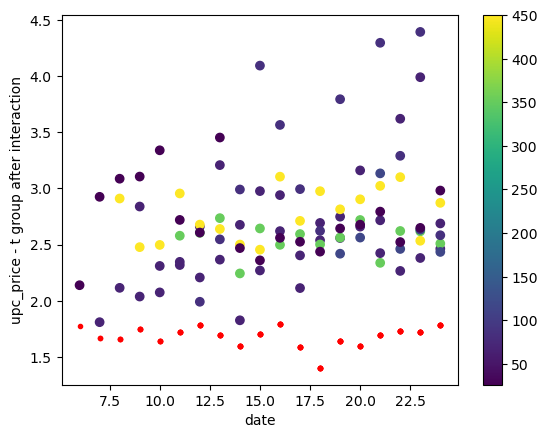

In [30]:
plt.scatter('date','upc_price', data = new_t_i, c=new_t_i['Population density (people/km^2)'].astype(int).to_numpy())
plt.plot('date','fitted_value', data = new_t_i, color='red', marker='.', linestyle='')
plt.ylabel('upc_price - t group after interaction')
plt.xlabel('date')
plt.colorbar()
#plt.xlim(445,455)

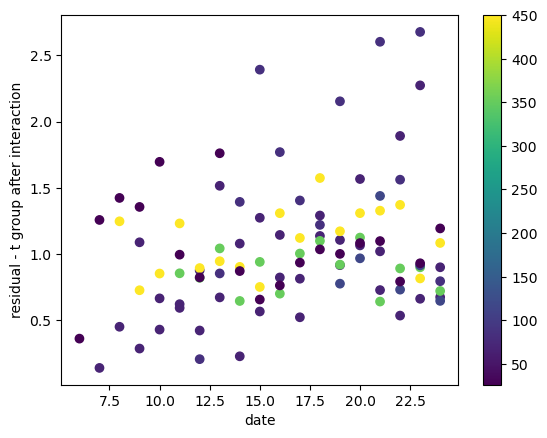

In [31]:
plt.scatter('date','residual', data = new_t_i, c=new_t_i['Population density (people/km^2)'].astype(int).to_numpy())
#plt.plot('date','fitted_value', data = new_t_i, color='red', marker='.', linestyle='')
plt.ylabel('residual - t group after interaction')
plt.xlabel('date')
plt.colorbar()
#plt.xlim(445,455)

### 3. Identifying counties for which residuals (aggregated SSR) are maximal/minimal

#### 3.1. Counties sorted by aggregated SSR

In [32]:
df_SSR = new.groupby(['store_state', 'guessed_store_county',
       'guessed_store_county_fips']).mean()
df_SSR['SSR']=np.sqrt(df_SSR['s_residual'])
df_SSR = df_SSR[['SSR']].sort_values(by=["SSR"])
df_SSR.head(50)

C:\Users\inesn\AppData\Local\Temp\ipykernel_38344\1524736469.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  'guessed_store_county_fips']).mean()


SSR
store_state guessed_store_county guessed_store_county_fips          
NC          DUPLIN               37061                      0.343277
            MONTGOMERY           37123                      0.376195
            NORTHAMPTON          37131                      0.639558
            JONES                37103                      0.694420
            BURKE                37023                      0.724472
            ALEXANDER            37003                      0.764069
            MARTIN               37117                      0.822993
            LINCOLN              37109                      0.824923
            HALIFAX              37083                      0.872183
            SWAIN                37173                      0.879017
            BEAUFORT             37013                      0.889627
            CHEROKEE             37039                      0.892676
            WASHINGTON           37187                      0.913754
            FORSYTH              37067                      0.965558
            CLEVELAND            37045                      1.002755
            PASQUOTANK           37139                      1.026438
            IREDELL              37097                      1.046451
            SURRY                37171                      1.052462
            SAMPSON              37163                      1.052952
            CLAY                 37043                      1.055798
            RUTHERFORD           37161                      1.059515
            HERTFORD             37091                      1.063063
            BLADEN               37017                      1.069116
            UNION                37179                      1.069854
            WILKES               37193                      1.078882
            ALAMANCE             37001                      1.083884
            ROWAN                37159                      1.090521
            COLUMBUS             37047                      1.102489
            LENOIR               37107                      1.104637
            PENDER               37141                      1.107913
            CALDWELL             37027                      1.116171
            WAKE                 37183                      1.133744
            CABARRUS             37025                      1.156356
            GRANVILLE            37077                      1.159733
            HENDERSON            37089                      1.160007
            NEW HANOVER          37129                      1.192228
            RICHMOND             37153                      1.205748
            BUNCOMBE             37021                      1.212496
            GASTON               37071                      1.218262
            JACKSON              37099                      1.238943
            FRANKLIN             37069                      1.241274
            DARE                 37055                      1.243398
            ORANGE               37135                      1.244379
            ROCKINGHAM           37157                      1.305006
            VANCE                37181                      1.305861
            ASHE                 37009                      1.308283
            EDGECOMBE            37065                      1.309749
            HAYWOOD              37087                      1.313751
            ALLEGHANY            37005                      1.343838
            SCOTLAND             37165                      1.354317

In [33]:
df_n = pd.merge(df_SSR, new, on = ['store_state', 'guessed_store_county',
       'guessed_store_county_fips'])
df_n = df_n.sort_values(by=['SSR'])
df_n.tail(60)

,store_state,guessed_store_county,guessed_store_county_fips,SSR,upc_price,nb_of_obs,Population density (people/km^2),treat,interaction,time_effects,Opening_date,Closing_date,fitted_value,residual,date,s_residual
1472,NC,POLK,37149,1.638449,3.325000,2,33.232278,False,False,"(2015, 10)",NaT,NaT,1.358095,1.966905,10,3.868716
1469,NC,POLK,37149,1.638449,2.280000,1,33.232278,False,False,"(2015, 6)",NaT,NaT,1.476010,0.803990,6,0.646401
1496,NC,MACON,37113,1.816900,2.593333,3,25.768399,False,False,"(2015, 12)",NaT,NaT,1.482653,1.110680,12,1.233611
1501,NC,MACON,37113,1.816900,1.850000,2,25.768399,False,False,"(2016, 11)",NaT,NaT,1.424206,0.425794,23,0.181300
1500,NC,MACON,37113,1.816900,1.995000,2,25.768399,False,False,"(2016, 10)",NaT,NaT,1.434457,0.560543,22,0.314209
1499,NC,MACON,37113,1.816900,3.990000,1,25.768399,False,False,"(2016, 8)",NaT,NaT,1.313954,2.676046,20,7.161224
1502,NC,MACON,37113,1.816900,2.240000,2,25.768399,False,False,"(2016, 12)",NaT,NaT,1.486454,0.753546,24,0.567832
1497,NC,MACON,37113,1.816900,3.990000,1,25.768399,False,False,"(2016, 4)",NaT,NaT,1.494167,2.495833,16,6.229183
1495,NC,MACON,37113,1.816900,3.875000,2,25.768399,False,False,"(2015, 11)",NaT,NaT,1.429627,2.445373,11,5.979848
1498,NC,MACON,37113,1.816900,1.875000,2,25.768399,False,False,"(2016, 6)",NaT,NaT,1.142052,0.732948,18,0.537212


####  3.2. Impact of density on aggregated SSR

Text(0.5, 0, 'Density')

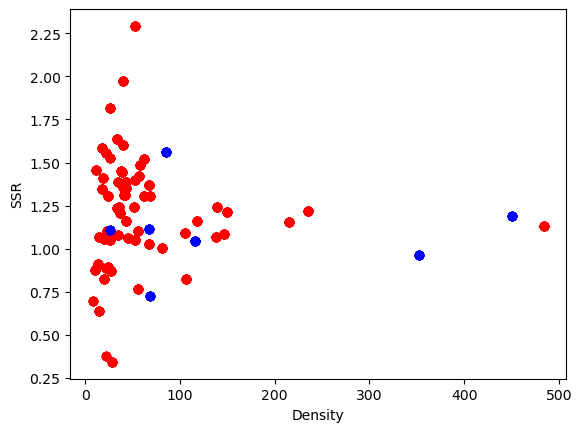

In [34]:
plt.scatter('Population density (people/km^2)','SSR', data = df_n[~df_n.treat], c='red')
plt.scatter('Population density (people/km^2)','SSR', data = df_n[(df_n.treat)&(~df_n.interaction)], c='blue')
#plt.scatter('Population density (people/km^2)','SSR', data = df_n[(df_n.treat)&(df_n.interaction)], c='yellow', marker = '.')
#plt.plot('date','fitted_value', data = new_t_i, color='red', marker='.', linestyle='')
plt.ylabel('SSR')
plt.xlabel('Density')
#plt.xlim(445,455)df_n['treat'].astype(int).to_numpy()

####  3.3. Impact of price on aggregated SSR ??? Not relevant ?

Text(0.5, 0, 'upc_price')

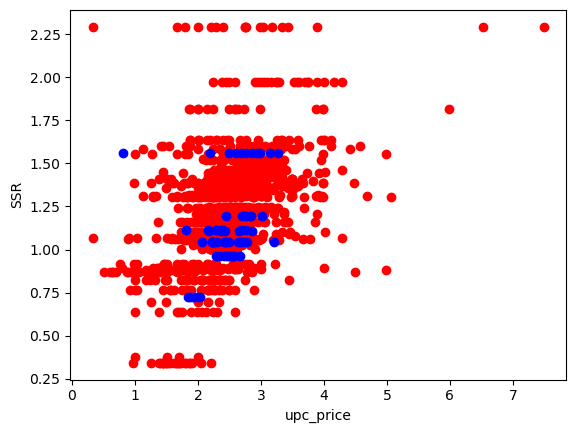

In [35]:
plt.scatter('upc_price','SSR', data = df_n[~df_n.treat], c='red')
plt.scatter('upc_price','SSR', data = df_n[(df_n.treat)&(~df_n.interaction)], c='blue')
#plt.scatter('Population density (people/km^2)','SSR', data = df_n[(df_n.treat)&(df_n.interaction)], c='yellow', marker = '.')
#plt.plot('date','fitted_value', data = new_t_i, color='red', marker='.', linestyle='')
plt.ylabel('SSR')
plt.xlabel('upc_price')
#plt.xlim(445,455)df_n['treat'].astype(int).to_numpy()

#### 3.4. Impact of the number of observations on aggregated SSR

Text(0.5, 0, 'nb_of_obs')

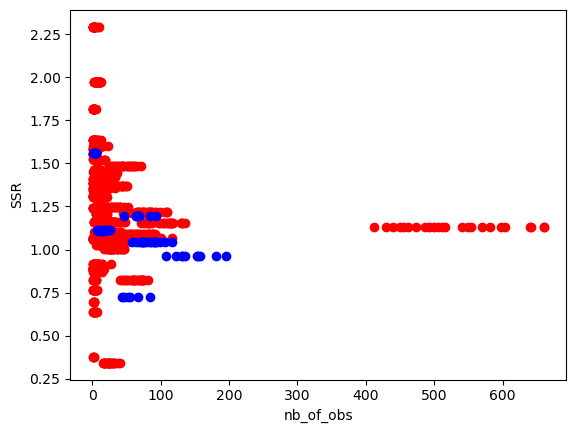

In [36]:
plt.scatter('nb_of_obs','SSR', data = df_n[~df_n.treat], c='red')
plt.scatter('nb_of_obs','SSR', data = df_n[(df_n.treat)&(~df_n.interaction)], c='blue')
#plt.scatter('Population density (people/km^2)','SSR', data = df_n[(df_n.treat)&(df_n.interaction)], c='yellow', marker = '.')
#plt.plot('date','fitted_value', data = new_t_i, color='red', marker='.', linestyle='')
plt.ylabel('SSR')
plt.xlabel('nb_of_obs')
#plt.xlim(445,455)df_n['treat'].astype(int).to_numpy()